In [1]:
using Pkg; Pkg.activate("C:\\Users\\KarlH\\Desktop\\ComputationalPhysicsMaster\\Code\\OrbitalNeuralMethods")
using OrbitalNeuralMethods
import OrbitalNeuralMethods as onm

  Activating project at `C:\Users\KarlH\Desktop\ComputationalPhysicsMaster\Code\OrbitalNeuralMethods`


In [8]:
function move_around(positions, mini, n)
    for i in 1:10000
        new_idx = rand(1:n)
        positions[new_idx] = randn()
        onm.update_sort!(mini, new_idx, positions[new_idx])
    end
end

move_around (generic function with 2 methods)

In [9]:
function move_around(positions, n)
    p = sortperm(positions)
    x_sort = positions[p]
    p_rev = sortperm(p)

    for i in 1:10000
        new_idx = rand(1:n)
        positions[new_idx] = randn()
        sortperm!(p, positions)
        for j in 1:n
            x_sort[j] = positions[p[j]]
        end
        sortperm!(p_rev, p)
    end
end

move_around (generic function with 2 methods)

In [96]:
4.2778 / 0.0946 

45.219873150105705

In [ ]:
for n in [2, 10, 25, 50, 100]
    positions = rand(n);
    mini = onm.MiniSort(positions);
    t1 = @elapsed move_around(positions, mini, n)
    push!(t1s, t1)
    positions = rand(n);
    t2 = @elapsed move_around(positions, n)
    push!(t2s, t2)
    #print("$(n) & $(round(t1, digits=4)) & $(round(t2, digits=4)) \\\\ \n\\hline \n")
end

In [36]:
t1s = []
t2s = []

for n in 10:10:1000
    positions = rand(n);
    mini = onm.MiniSort(positions);
    t1 = @elapsed move_around(positions, mini, n)
    push!(t1s, t1)
    positions = rand(n);
    t2 = @elapsed move_around(positions, n)
    push!(t2s, t2)
    #print("$(n) & $(round(t1, digits=4)) & $(round(t2, digits=4)) \\\\ \n\\hline \n")
end

In [13]:
import Plots as plt
plt.pyplot()

Plots.PyPlotBackend()

In [88]:
t2s[end] .- t2s[1]

0.6996746

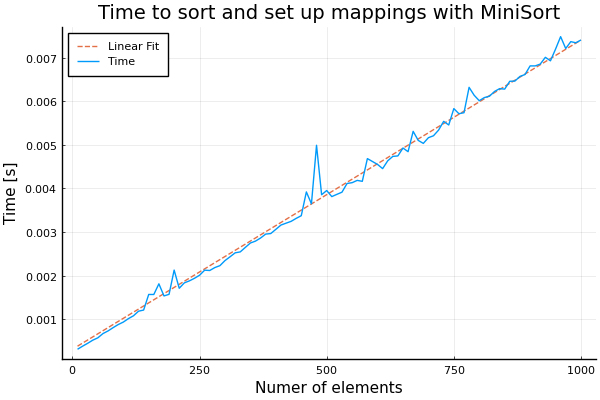

In [119]:
plt.plot(x, t1s[1] .+ x .* 0.00000710170, c=2, label="Linear Fit", ls=:dash)
plt.plot!(10:10:1000, t1s, legend=:topleft, title="Time to sort and set up mappings with MiniSort", xlabel="Numer of elements", ylabel="Time [s]",c=1, label="Time")

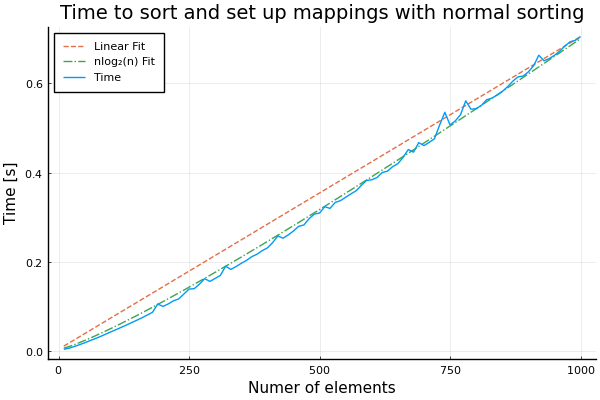

In [132]:
x = [i for i in 10:10:1000]

plt.plot(x, t2s[1] .+ x .* 0.0006996746, label="Linear Fit", c=2, ls=:dash)
plt.plot!(x, t2s[1] .+ 0.0000697654 .* x.*log2.(x), label="nlog₂(n) Fit", c=3, ls=:dashdot)
plt.plot!(x, t2s, legend=:topleft, title="Time to sort and set up mappings with normal sorting", xlabel="Numer of elements", ylabel="Time [s]", label="Time", c=1)

In [95]:
for i in [1, 5, 10, 25, 50, 100]
    print("$(x[i]) & $(round(t1s[i], digits=4)) & $(round(t2s[i], digits=4)) \\\\ \n\\hline \n")
end

10 & 0.0003 & 0.0044 \\ 
\hline 
50 & 0.0006 & 0.0188 \\ 
\hline 
100 & 0.0009 & 0.0434 \\ 
\hline 
250 & 0.002 & 0.1392 \\ 
\hline 
500 & 0.004 & 0.3093 \\ 
\hline 
1000 & 0.0074 & 0.7041 \\ 
\hline 


In [135]:
10453 / 1000^2

0.010453

In [154]:
5.35524 .+ 0.0104476*1000^2

10452.955240000001

In [140]:
ns2 = [i for i in 10:5:1000];

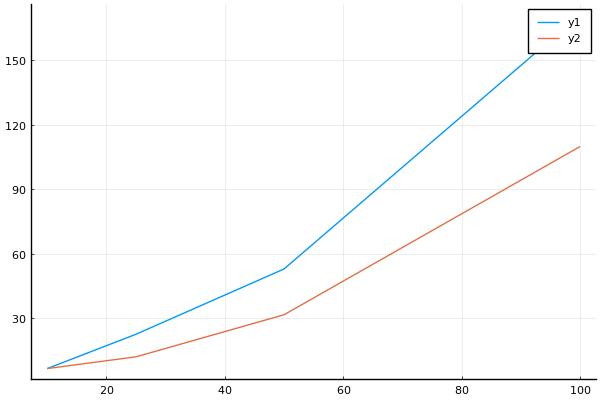

In [167]:
ns = [10, 25, 50, 100]#, 500, 1000]
ts = [6.4, 22.4, 52.8, 171.3]#, 2675, 10453]
plt.plot(ns, ts)
plt.plot!(ns, 5.35524 .+ 0.0104476.*ns.^2)

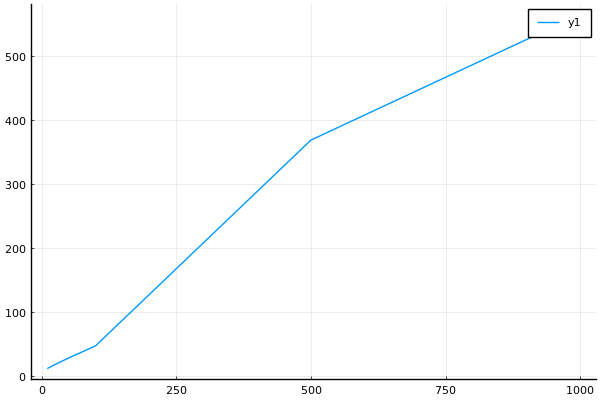

In [166]:
ts2 = [11.3, 17.9, 27.9, 47.0, 368.7, 565]
plt.plot(ns, ts2)